In [ ]:
%pip install torch torchvision
%pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from torch import nn
from torchvision.transforms import ToTensor
import glob
import cv2
import numpy as np
from torch.utils.data import Dataset, DataLoader
from pathlib import Path
import random
from PIL import Image
import os
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision import transforms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/ADL Project Working Folder/dataset/train'
test_dir = '/content/drive/MyDrive/ADL Project Working Folder/dataset/test'

train_dir, test_dir

('/content/drive/MyDrive/ADL Project Working Folder/dataset/train',
 '/content/drive/MyDrive/ADL Project Working Folder/dataset/test')

In [ ]:
from PIL import Image

In [ ]:
image_path = '/content/drive/MyDrive/ADL Project Working Folder/dataset/train/1/1002_11_aug0.jpg'

Random image path: /content/drive/MyDrive/ADL Project Working Folder/dataset/train/1/1002_11_aug0.jpg
Image height: 1024
Image width: 576


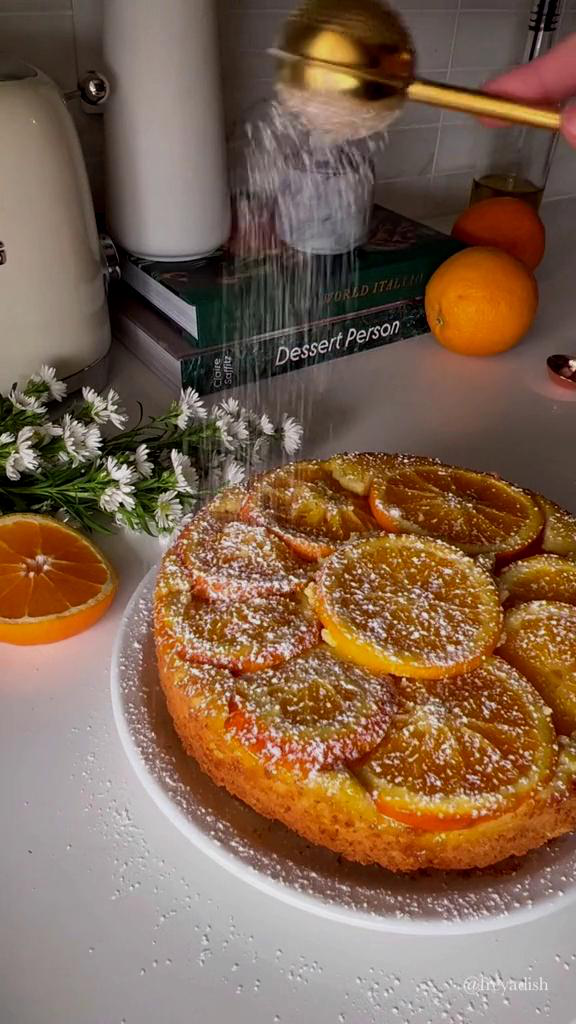

In [ ]:
img = Image.open(image_path)



print(f"Random image path: {image_path}")

print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

In [ ]:
data_transforms = transforms.Compose([
    transforms.Resize(size=(128, 128)),
    # transforms.CenterCrop((128, 128)),
    #transforms.RandomVerticalFlip(p=0.2),
    transforms.ToTensor()  
])

In [ ]:
'''
# Define the data augmentations we want to perform
data_transforms = transforms.Compose([
    transforms.Resize(size=(128, 128)),
    transforms.RandomHorizontalFlip(p=1.0),
])

# Loop through each image in the train/1 folder and apply the augmentations
for filename in os.listdir(train_dir):
    # Load the image
    img_path = os.path.join(train_dir, filename)
    img = Image.open(img_path)

    # Apply the data augmentations
    img = data_transforms(img)

    # Save the augmented image
    new_filename = os.path.splitext(filename)[0] + "_aug.jpg"
    new_path = os.path.join(train_dir, new_filename)
    img.save(new_path)

'''

AttributeError: ignored

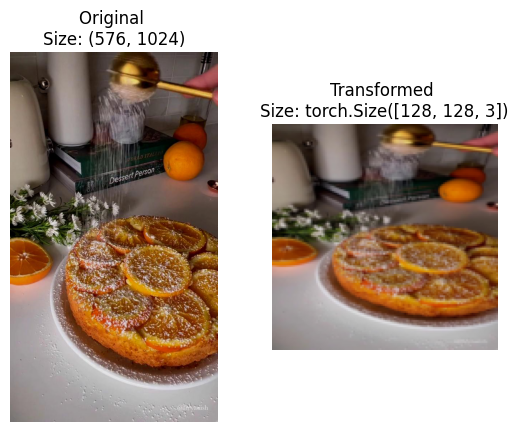

In [ ]:
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transforms, 
                                  target_transform=None) 
def plot_transformed_images(image_paths, transform):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path, 
                        transform=data_transforms, 
                        )
test_data = datasets.ImageFolder(root=test_dir, 
                                 transform=data_transforms)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

In [ ]:
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transforms, 
                                  target_transform=None) 

In [ ]:
test_data = datasets.ImageFolder(root=test_dir,
                                  transform=data_transforms, 
                                  target_transform=None) 

In [ ]:
class_names = train_data.classes
class_names

['0', '1']

In [ ]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'0': 0, '1': 1}

In [ ]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")


Image tensor:
tensor([[[0.6196, 0.5725, 0.5529,  ..., 0.4824, 0.4078, 0.4000],
         [0.5294, 0.5647, 0.6000,  ..., 0.5020, 0.4824, 0.4314],
         [0.5412, 0.6078, 0.6510,  ..., 0.5176, 0.4824, 0.4588],
         ...,
         [0.6078, 0.6118, 0.5843,  ..., 0.4078, 0.4392, 0.4549],
         [0.5843, 0.5490, 0.5255,  ..., 0.6392, 0.6902, 0.6980],
         [0.5765, 0.5216, 0.5608,  ..., 0.6863, 0.7020, 0.7216]],

        [[0.4941, 0.4549, 0.4157,  ..., 0.4392, 0.3098, 0.3333],
         [0.4314, 0.4706, 0.5059,  ..., 0.4941, 0.4471, 0.4078],
         [0.4510, 0.5176, 0.5922,  ..., 0.5216, 0.4784, 0.4510],
         ...,
         [0.4706, 0.4745, 0.4549,  ..., 0.2902, 0.3255, 0.3529],
         [0.4510, 0.4196, 0.4039,  ..., 0.4824, 0.5569, 0.5804],
         [0.4431, 0.3961, 0.4471,  ..., 0.5176, 0.5451, 0.5686]],

        [[0.4980, 0.4549, 0.4235,  ..., 0.4157, 0.2902, 0.3137],
         [0.4431, 0.4824, 0.5255,  ..., 0.4627, 0.4235, 0.3961],
         [0.4627, 0.5333, 0.6039,  ..., 0.49

In [ ]:
# Turn Datasets into DataLoader's
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data, 
                                        batch_size=BATCH_SIZE, 
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader = DataLoader(test_data, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f0e967de700>,
 <torch.utils.data.dataloader.DataLoader at 0x7f0e96840fa0>)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*32*32,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=2).to(device)
model

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10240, out_features=2, bias=True)
  )
)

In [ ]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [ ]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_1
model_1_results = train(model=model, 
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.5940 | train_acc: 0.6754 | test_loss: 0.5962 | test_acc: 0.6656
Epoch: 2 | train_loss: 0.5309 | train_acc: 0.7295 | test_loss: 0.5388 | test_acc: 0.7328
Epoch: 3 | train_loss: 0.4926 | train_acc: 0.7549 | test_loss: 0.4359 | test_acc: 0.8078
Epoch: 4 | train_loss: 0.4680 | train_acc: 0.7745 | test_loss: 0.4618 | test_acc: 0.7875
Epoch: 5 | train_loss: 0.4391 | train_acc: 0.7882 | test_loss: 0.4418 | test_acc: 0.8203
Total training time: 4727.375 seconds


In [ ]:
import os
os.makedirs("/content/drive/MyDrive/ADL Project Working Folder/Model Outputs/VGG")


In [ ]:
os.path.exists("/content/drive/MyDrive/ADL Project Working Folder/Model Outputs/Adam")

True

In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/ADL Project Working Folder/Model Outputs/VGG/VGG.pth")


In [ ]:
model = TinyVGG(3,10,2)
model.load_state_dict(torch.load("/content/drive/MyDrive/ADL Project Working Folder/Model Outputs/VGG/VGG_aug.pth"))
model.to(device)

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10240, out_features=2, bias=True)
  )
)

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def evaluate(model, test_dataloader):
    model.eval()
    true_labels = []
    predictions = []
    with torch.no_grad():
        for images, labels in test_dataloader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            true_labels.extend(labels.cpu().numpy())
            predictions.extend(preds.cpu().numpy())
    cm = confusion_matrix(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    print("true_labels", true_labels, '\n')
    print("predictions", predictions, '\n')
    return cm, precision, recall, f1

cm, precision, recall, f1 = evaluate(model, test_dataloader)
print('Confusion Matrix: \n', cm)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

true_labels [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Testing


In [ ]:
#load 11 frames from 0 folder 
import os
import random
import torchvision.io

path = '/content/drive/MyDrive/ADL Project Working Folder/dataset/test/0'

# Get a list of all image files in the specified path
image_files = [f for f in os.listdir(path) if f.endswith('.jpg')]

# Randomly select 11 image files from the list
random_image_files = random.sample(image_files, 5)

# Load each selected image and store them in a list
images = []
for file in random_image_files:
    image_path = os.path.join(path, file)
    image = torchvision.io.read_image(image_path)
    images.append(image)

# The loaded images are now stored in the 'images' list


In [ ]:
#load 1 frame from 1 folder

path = '/content/drive/MyDrive/ADL Project Working Folder/dataset/test/1'

# Get a list of all image files in the specified path
image_files = [f for f in os.listdir(path) if f.endswith('.jpg')]

# Randomly select 11 image files from the list
random_image_files = random.sample(image_files, 1)


for file in random_image_files:
    image_path = os.path.join(path, file)
    image = torchvision.io.read_image(image_path)
    images.append(image)

In [ ]:
print(len(images))

6


In [ ]:
print(f"testing image tensor:\n{images}\n")
#print(f"tesing image shape: {images.shape}\n")
#print(f"testing image dtype: {images.dtype}")

testing image tensor:
[tensor([[[ 28,  28,  28,  ..., 139, 140, 140],
         [ 27,  27,  27,  ..., 139, 140, 140],
         [ 27,  27,  27,  ..., 138, 139, 139],
         ...,
         [215, 214, 208,  ...,  54,  54,  54],
         [215, 213, 208,  ...,  54,  54,  54],
         [215, 213, 208,  ...,  54,  54,  54]],

        [[ 24,  24,  24,  ...,  24,  25,  25],
         [ 23,  23,  23,  ...,  24,  25,  25],
         [ 23,  23,  23,  ...,  23,  24,  24],
         ...,
         [198, 197, 191,  ...,  48,  48,  48],
         [198, 196, 191,  ...,  48,  48,  48],
         [198, 196, 191,  ...,  48,  48,  48]],

        [[ 25,  25,  25,  ...,  41,  42,  42],
         [ 24,  24,  24,  ...,  41,  42,  42],
         [ 24,  24,  24,  ...,  40,  41,  41],
         ...,
         [188, 187, 181,  ...,  48,  48,  48],
         [188, 186, 181,  ...,  48,  48,  48],
         [188, 186, 181,  ...,  48,  48,  48]]], dtype=torch.uint8), tensor([[[151, 151, 151,  ..., 188, 187, 186],
         [151, 1

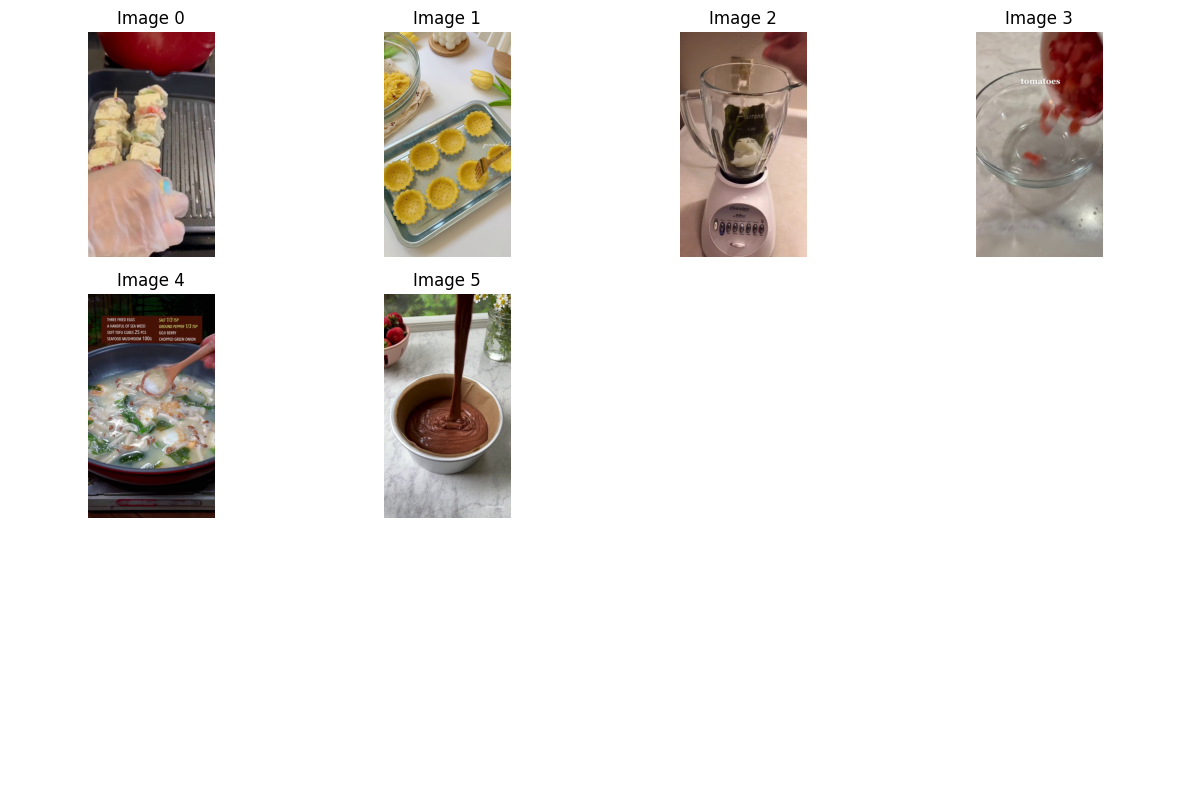

In [ ]:
import matplotlib.pyplot as plt

# Plot all the loaded images
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))
for i, ax in enumerate(axs.flat):
    if i < len(images):
        image = images[i]
        image = image.permute(1, 2, 0) # Permute image dimensions from CHW -> HWC
        ax.imshow(image)
        ax.set_title(f"Image {i}")
        ax.axis(False)
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
import torchvision.transforms as transforms

# Create transform pipeline to resize image
image_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
])

# Create a list to store transformed images
transformed_images = []

# Transform each image in the 'images' list
for image in images:
    transformed_image = image_transforms(image)
    transformed_images.append(transformed_image)

# Print out the shape of the first transformed image
print(f"Original shape: {images[0].shape}")
print(f"New shape: {transformed_images[0].shape}")


Original shape: torch.Size([3, 1024, 576])
New shape: torch.Size([3, 128, 128])


In [ ]:

# Set model to evaluation mode
model.eval()

# Use torch.no_grad() to disable gradient computation to save memory
with torch.no_grad():

    # Stack the transformed images into a single tensor
    batch = torch.stack(transformed_images, dim=0).float().to('cuda')

    # Make predictions on the batch of images using the model
    with torch.inference_mode():
        custom_image_pred = model(batch)

# Print the predicted classes for each image in the batch
for i, image_pred in enumerate(custom_image_pred):
    print(f"Image {i} predicted class: {torch.argmax(image_pred)}")


Image 0 predicted class: 1
Image 1 predicted class: 1
Image 2 predicted class: 1
Image 3 predicted class: 1
Image 4 predicted class: 1
Image 5 predicted class: 1


In [ ]:

import torch.nn.functional as F

# Make predictions on the batch of images using the model
with torch.inference_mode():
    custom_image_pred = model(batch)

# Convert logits to probabilities using softmax
custom_image_probs = F.softmax(custom_image_pred, dim=1)

# Print the predicted classes and probabilities for each image in the batch
for i in range(len(images)):
    print(f"Image {i} predicted class: {custom_image_probs[i].argmax()}, probability: {custom_image_probs[i].max():.4f}")


Image 0 predicted class: 1, probability: 1.0000
Image 1 predicted class: 1, probability: 1.0000
Image 2 predicted class: 1, probability: 1.0000
Image 3 predicted class: 1, probability: 1.0000
Image 4 predicted class: 1, probability: 1.0000
Image 5 predicted class: 1, probability: 1.0000


In [ ]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str('/content/drive/MyDrive/ADL Project Working Folder/dataset/test/0'))

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

RuntimeError: ignored